In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("adult.xls", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32562 non-null  object
 1   1       32562 non-null  object
 2   2       32562 non-null  object
 3   3       32562 non-null  object
 4   4       32562 non-null  object
 5   5       32562 non-null  object
 6   6       32562 non-null  object
 7   7       32562 non-null  object
 8   8       32562 non-null  object
 9   9       32562 non-null  object
 10  10      32562 non-null  object
 11  11      32562 non-null  object
 12  12      32562 non-null  object
 13  13      32562 non-null  object
 14  14      32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [5]:
for i in range(14):
  df.drop(df.loc[df[i]=="?"].index, inplace=True)
  #df = df.reset_index(drop=True)
  #dataset = df.values
df.dropna(inplace=True)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163,30163
unique,73,8,20264,17,17,8,15,7,6,3,119,91,95,42,3
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,852,22286,13,9840,9840,14065,4038,12463,25933,20380,27624,28735,14251,27504,22654


In [8]:
col_names = [ 'age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']


df.columns = col_names

col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [10]:
df['income'].value_counts()

<=50K     22654
>50K       7508
income        1
Name: income, dtype: int64

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
X = df.drop(['income'], axis=1)

y = df['income']

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)


In [14]:
X_train.shape, X_test.shape

((12065, 14), (18098, 14))

In [15]:
X_train.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education.num     object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain      object
capital.loss      object
hours.per.week    object
native.country    object
dtype: object

In [16]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
25980,25,Private,181598,11th,7,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
18514,32,Private,106742,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
18972,34,Private,318641,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,45,United-States
1860,55,Private,116878,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,30,United-States
23854,42,Private,208726,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States


In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
243,12.0,2.0,-1.0,2.0,2.0,1.0,9.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
26865,47.0,1.0,5261.0,6.0,6.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,15.0,1.0
19170,22.0,1.0,-1.0,5.0,5.0,2.0,8.0,4.0,1.0,2.0,1.0,1.0,-1.0,1.0
13458,2.0,4.0,1637.0,5.0,5.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,18.0,1.0
9600,44.0,1.0,-1.0,2.0,2.0,3.0,9.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0


In [20]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8177


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [24]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8167
Test set score: 0.8177


[Text(334.8, 380.52, 'X[5] <= 1.5\ngini = 0.372\nsamples = 12065\nvalue = [9085, 2980]'),
 Text(167.4, 271.8, 'X[6] <= 4.5\ngini = 0.496\nsamples = 5647\nvalue = [3081, 2566]'),
 Text(83.7, 163.07999999999998, 'X[6] <= 2.5\ngini = 0.47\nsamples = 2348\nvalue = [887, 1461]'),
 Text(41.85, 54.360000000000014, 'gini = 0.475\nsamples = 532\nvalue = [326, 206]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.427\nsamples = 1816\nvalue = [561, 1255]'),
 Text(251.10000000000002, 163.07999999999998, 'X[10] <= 1.5\ngini = 0.446\nsamples = 3299\nvalue = [2194, 1105]'),
 Text(209.25, 54.360000000000014, 'gini = 0.425\nsamples = 2982\nvalue = [2069, 913]'),
 Text(292.95, 54.360000000000014, 'gini = 0.478\nsamples = 317\nvalue = [125, 192]'),
 Text(502.20000000000005, 271.8, 'X[10] <= 9.5\ngini = 0.121\nsamples = 6418\nvalue = [6004, 414]'),
 Text(418.5, 163.07999999999998, 'X[11] <= 22.5\ngini = 0.092\nsamples = 6119\nvalue = [5824, 295]'),
 Text(376.65000000000003, 54.360000000000014, '

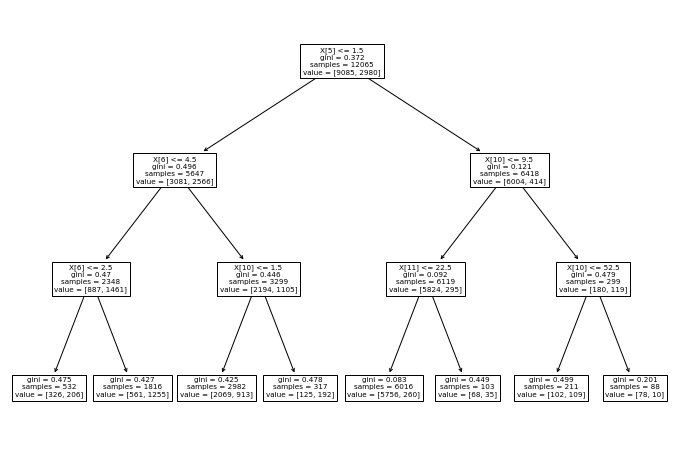

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [26]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
y_pred_en = clf_en.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8177


In [29]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8167


In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8167
Test set score: 0.8177


[Text(334.8, 380.52, 'X[5] <= 1.5\nentropy = 0.806\nsamples = 12065\nvalue = [9085, 2980]'),
 Text(167.4, 271.8, 'X[6] <= 4.5\nentropy = 0.994\nsamples = 5647\nvalue = [3081, 2566]'),
 Text(83.7, 163.07999999999998, 'X[6] <= 2.5\nentropy = 0.956\nsamples = 2348\nvalue = [887, 1461]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.963\nsamples = 532\nvalue = [326, 206]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.892\nsamples = 1816\nvalue = [561, 1255]'),
 Text(251.10000000000002, 163.07999999999998, 'X[10] <= 1.5\nentropy = 0.92\nsamples = 3299\nvalue = [2194, 1105]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.889\nsamples = 2982\nvalue = [2069, 913]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.968\nsamples = 317\nvalue = [125, 192]'),
 Text(502.20000000000005, 271.8, 'X[10] <= 9.5\nentropy = 0.345\nsamples = 6418\nvalue = [6004, 414]'),
 Text(418.5, 163.07999999999998, 'X[6] <= 4.5\nentropy = 0.279\nsamples = 6119\nvalue = [5824, 295]'),
 Text(376.650000000

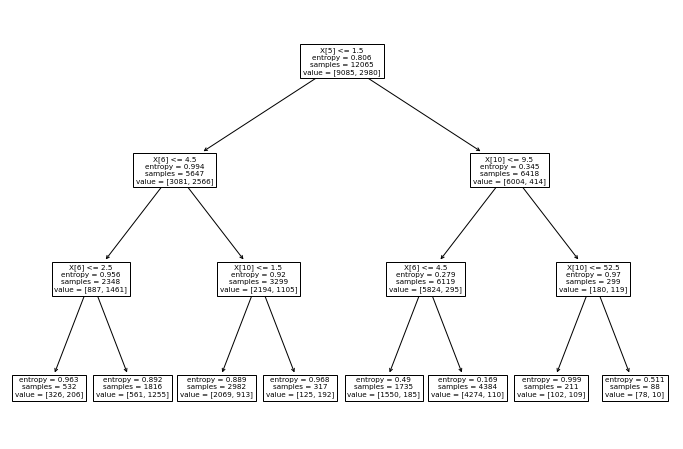

In [32]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[12462  1107     0]
 [ 2191  2337     0]
 [    1     0     0]]


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88     13569
        >50K       0.68      0.52      0.59      4528
      income       0.00      0.00      0.00         1

    accuracy                           0.82     18098
   macro avg       0.51      0.48      0.49     18098
weighted avg       0.81      0.82      0.81     18098

